In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
filepath="/content/drive/MyDrive/DAVLAB/ASSIGNMENT DATA FOLDERS/air quality.csv"
df=pd.read_csv(filepath)

**Observations from Data:**

**Identification of Constant Columns:** Upon inspection, it was noted that the columns "country" and "last_update" contained constant values for every row.

**Country :INDIA , last Updates : 17-04-2024 , 14:00**

**Unique Pollutants and Associated Metrics:** The dataset contained various unique pollutants, each associated with minimum, maximum, and average values.

**Consistency in Geographic Information**: The "longitude" and "latitude" values were consistent for each station across the dataset.

In [ ]:
df

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",17-04-2024 14:00,16.515083,80.518167,PM2.5,18.0,57.0,36.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",17-04-2024 14:00,16.515083,80.518167,CO,18.0,43.0,29.0
2,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",17-04-2024 14:00,13.204880,79.097889,NH3,1.0,3.0,1.0
3,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",17-04-2024 14:00,16.987287,81.736318,NO2,9.0,30.0,16.0
4,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",17-04-2024 14:00,16.987287,81.736318,SO2,11.0,46.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...
3195,India,West_Bengal,Kolkata,"Rabindra Bharati University, Kolkata - WBPCB",17-04-2024 14:00,22.627847,88.380669,NH3,17.0,18.0,17.0
3196,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",17-04-2024 14:00,22.511060,88.351420,PM10,28.0,105.0,79.0
3197,India,West_Bengal,Kolkata,"Rabindra Sarobar, Kolkata - WBPCB",17-04-2024 14:00,22.511060,88.351420,NO2,9.0,52.0,27.0
3198,India,West_Bengal,Kolkata,"Victoria, Kolkata - WBPCB",17-04-2024 14:00,22.544808,88.340369,SO2,11.0,32.0,16.0


In [ ]:
unique_pollutants = df['pollutant_id'].unique()

print("Unique pollutant IDs:", unique_pollutants)

Unique pollutant IDs: ['PM2.5' 'CO' 'NH3' 'NO2' 'SO2' 'OZONE' 'PM10']


**Decisions Made:**

**Exclusion of Constant Columns:** Due to the constant values in "country" and "last_update," it was decided not to include these columns as indices for the pivot table.

**Construction of Pivot Table:**

**Structuring the Data**: To organize the data effectively, values were created for "min," "max," and "avg," with each pollutant serving as column.



**Utilization of Geographic Information**: Leveraging the consistency in geographic data, the pivot table was structured to include "longitude" and "latitude" as part of the index to maintain geographic integrity along with state , city , station .

In [ ]:
data = pd.read_csv(filepath)

# Pivot the DataFrame
data_cleaned = data.pivot_table(values=["pollutant_min", "pollutant_max", "pollutant_avg"],
                                 columns=["pollutant_id"],
                                 index=["state", "city", "station","longitude", "latitude" ,],  # Include state, longitude, latitude, and station in the index
                                 aggfunc="mean")

data_cleaned

pollutant_avg  \
pollutant_id                                                                                                   CO   
state          city              station                                        longitude latitude                  
Andhra_Pradesh Amaravati         Secretariat, Amaravati - APPCB                 80.518167 16.515083          29.0   
               Anantapur         Gulzarpet, Anantapur - APPCB                   77.593027 14.675886          37.0   
               Chittoor          Gangineni Cheruvu, Chittoor - APPCB            79.097889 13.204880          24.0   
               Rajamahendravaram Anand Kala Kshetram, Rajamahendravaram - APPCB 81.736318 16.987287          35.0   
               Tirupati          Tirumala, Tirupati - APPCB                     79.350000 13.670000          39.0   
...                                                                                                           ...   
West_Bengal    Kolkata           Jadavpur, Kolkata - WBPCB                      88.369170 22.499290          16.0   
                                 Rabindra Bharati University, Kolkata - WBPCB   88.380669 22.627847          32.0   
                                 Rabindra Sarobar, Kolkata - WBPCB              88.351420 22.511060          29.0   
                                 Victoria, Kolkata - WBPCB                      88.340369 22.544808          73.0   
               Siliguri          Ward-32 Bapupara, Siliguri - WBPCB             88.415250 26.687923          25.0   

                                                                                                           \
pollutant_id                                                                                          NH3   
state          city              station                                        longitude latitude          
Andhra_Pradesh Amaravati         Secretariat, Amaravati - APPCB                 80.518167 16.515083   4.0   
               Anantapur         Gulzarpet, Anantapur - APPCB                   77.593027 14.675886   3.0   
               Chittoor          Gangineni Cheruvu, Chittoor - APPCB            79.097889 13.204880   1.0   
               Rajamahendravaram Anand Kala Kshetram, Rajamahendravaram - APPCB 81.736318 16.987287   4.0   
               Tirupati          Tirumala, Tirupati - APPCB                     79.350000 13.670000   1.0   
...                                                                                                   ...   
West_Bengal    Kolkata           Jadavpur, Kolkata - WBPCB                      88.369170 22.499290   3.0   
                                 Rabindra Bharati University, Kolkata - WBPCB   88.380669 22.627847  17.0   
                                 Rabindra Sarobar, Kolkata - WBPCB              88.351420 22.511060   4.0   
                                 Victoria, Kolkata - WBPCB                      88.340369 22.544808   2.0   
               Siliguri          Ward-32 Bapupara, Siliguri - WBPCB             88.415250 26.687923   9.0   

                                                                                                           \
pollutant_id                                                                                          NO2   
state          city              station                                        longitude latitude          
Andhra_Pradesh Amaravati         Secretariat, Amaravati - APPCB                 80.518167 16.515083   7.0   
               Anantapur         Gulzarpet, Anantapur - APPCB                   77.593027 14.675886  28.0   
               Chittoor          Gangineni Cheruvu, Chittoor - APPCB            79.097889 13.204880   9.0   
               Rajamahendravaram Anand Kala Kshetram, Rajamahendravaram - APPCB 81.736318 16.987287  16.0   
               Tirupati          Tirumala, Tirupati - APPCB                     79.350000 13.670000  37.0   
...                                                           

In [ ]:
print(data_cleaned.head(5))


                                                                                                    pollutant_avg  \
pollutant_id                                                                                                   CO   
state          city              station                                        longitude latitude                  
Andhra_Pradesh Amaravati         Secretariat, Amaravati - APPCB                 80.518167 16.515083          29.0   
               Anantapur         Gulzarpet, Anantapur - APPCB                   77.593027 14.675886          37.0   
               Chittoor          Gangineni Cheruvu, Chittoor - APPCB            79.097889 13.204880          24.0   
               Rajamahendravaram Anand Kala Kshetram, Rajamahendravaram - APPCB 81.736318 16.987287          35.0   
               Tirupati          Tirumala, Tirupati - APPCB                     79.350000 13.670000          39.0   

                                                               

PIE CHART

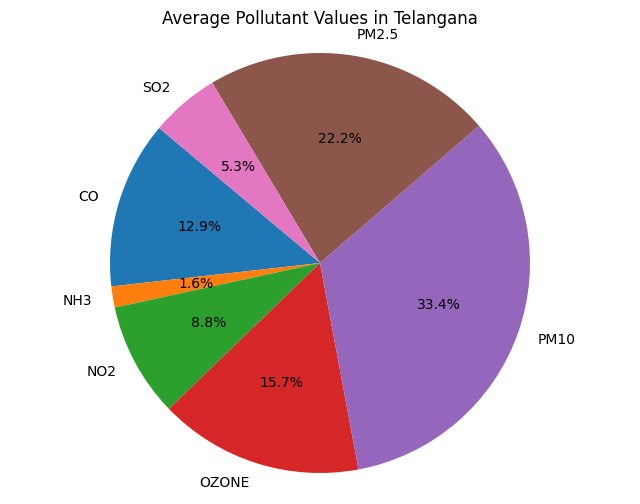

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already mounted your Google Drive and have access to the file
# Replace 'file_path' with the path to your data file
file_path = '/content/drive/MyDrive/DAVLAB/ASSIGNMENT DATA FOLDERS/air quality.csv'

# Read the data into a DataFrame
data = pd.read_csv(file_path)

# Assuming your data has columns like 'State', 'Pollutant', and 'Pollutant_avg'
# Replace these column names with your actual column names
state = 'Telangana'  # Specify the state for which you want to plot the pie chart

# Filter data for the specified state
state_data = data[data['state'] == state]

# Group data by 'Pollutant' and calculate the average 'Pollutant_avg' for each pollutant
pollutant_avg = state_data.groupby('pollutant_id')['pollutant_avg'].mean()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(pollutant_avg, labels=pollutant_avg.index, autopct='%1.1f%%', startangle=140)
plt.title('Average Pollutant Values in {}'.format(state))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


NORMAL DISTRIBUTION FIT

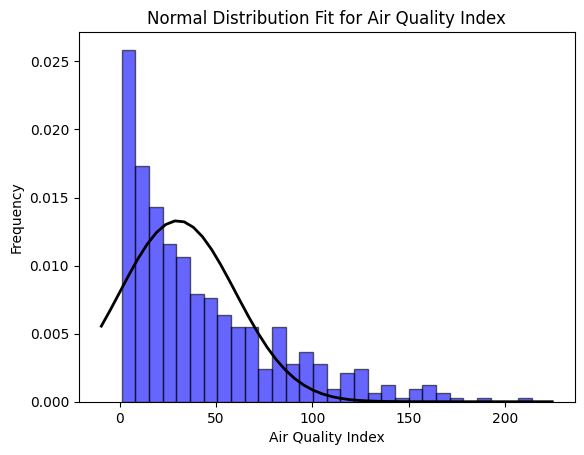

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


mean = 30  # Mean of the normal distribution
std_dev = 30  # Standard deviation of the normal distribution
#sample_size = 500  # Number of samples
air_quality_data = pd.read_csv("/content/drive/MyDrive/DAVLAB/ASSIGNMENT DATA FOLDERS/air quality.csv")
air_quality_data = air_quality_data.head(500)
air_quality_data=air_quality_data['pollutant_avg']
# Plot the histogram of the data
plt.hist(air_quality_data, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Plot the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 50)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Air Quality Index')
plt.ylabel('Frequency')
plt.title('Normal Distribution Fit for Air Quality Index')

# Show the plot
plt.show()


T TEST


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

df = pd.read_csv("/content/drive/MyDrive/DAVLAB/ASSIGNMENT DATA FOLDERS/air quality.csv")

data_andhra = data_cleaned.loc['Andhra_Pradesh']['pollutant_avg']['CO']
data_andhra

data_telangana = data_cleaned.loc['Telangana']['pollutant_avg']['CO']
data_telangana


city       station                                       longitude  latitude 
Hyderabad  Bollaram Industrial Area, Hyderabad - TSPCB   78.358528  17.540891    30.0
           Central University, Hyderabad - TSPCB         78.334361  17.460103    17.0
           ECIL Kapra, Hyderabad - TSPCB                 78.566959  17.470431    38.0
           ICRISAT Patancheru, Hyderabad - TSPCB         78.278777  17.518400    47.0
           IITH Kandi, Hyderabad - TSPCB                 78.126199  17.585705    11.0
           Kompally Municipal Office, Hyderabad - TSPCB  78.486949  17.544899    49.0
           Nacharam_TSIIC IALA, Hyderabad - TSPCB        78.569354  17.429398    44.0
           New Malakpet, Hyderabad - TSPCB               78.508640  17.372060    21.0
           Ramachandrapuram, Hyderabad - TSPCB           78.286195  17.528544    27.0
           Sanathnagar, Hyderabad - TSPCB                78.433215  17.455946    43.0
           Somajiguda, Hyderabad - TSPCB                 78.45

In [ ]:
t_statistic, p_value = ttest_ind(data_andhra, data_telangana)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 0.12307510245277845
P-Value: 0.9035803711022694


ANOVA (ANALYSIS OF VARIANCE)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats

df = pd.read_csv("/content/drive/MyDrive/DAVLAB/ASSIGNMENT DATA FOLDERS/air quality.csv")

data_andhra = data_cleaned.loc['Andhra_Pradesh']['pollutant_avg']['CO']
data_andhra

data_telangana = data_cleaned.loc['Telangana']['pollutant_avg'][ 'CO']
data_telangana

data_West_Bengal = data_cleaned.loc['West_Bengal']['pollutant_avg']['CO']
data_West_Bengal

# data_karnataka = data_cleaned.loc['Karnataka']['pollutant_avg']['CO']
# data_karnataka



city         station                                       longitude  latitude 
Asansol      Asansol Court Area, Asansol - WBPCB           86.945968  23.685297    57.0
Barrackpore  SVSPA Campus, Barrackpore - WBPCB             88.361759  22.760558     4.0
Durgapur     Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB  87.289222  23.540435    55.0
Haldia       Priyambada Housing Estate, Haldia - WBPCB     88.109737  22.060470    27.0
Howrah       Belur Math, Howrah - WBPCB                    88.352017  22.629801    14.0
             Ghusuri, Howrah - WBPCB                       88.347422  22.611968    13.0
Kolkata      Ballygunge, Kolkata - WBPCB                   88.363802  22.536751    18.0
             Bidhannagar, Kolkata - WBPCB                  88.410025  22.581570    33.0
             Fort William, Kolkata - WBPCB                 88.342674  22.556640    26.0
             Jadavpur, Kolkata - WBPCB                     88.369170  22.499290    16.0
             Rabindra Bharati University

In [ ]:
f_statistic, p_value = stats.f_oneway(data_andhra,data_telangana,data_West_Bengal )

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 0.22201488728238525
P-value: 0.8022521140637304
